In [3]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# モデル関連

# 警告の非表示
import warnings
warnings.filterwarnings('ignore')

# データの読み込み
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/compe2"

# データのパスを設定
INPUT_DIR = "./input/"

# データの読み込み
train = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")

Mounted at /content/drive
/content/drive/MyDrive/compe2


In [4]:
# データの概要を表示
print("Train Data Info:")
print(train.info())
print("\nTest Data Info:")
print(test.info())

# 欠損値の確認
print("\nMissing Values in Train Data:")
print(train.isnull().sum())
print("\nMissing Values in Test Data:")
print(test.isnull().sum())

# 基本統計量
print("\nDescriptive Statistics for Train Data:")
print(train.describe())
print("\nDescriptive Statistics for Test Data:")
print(test.describe())

# カテゴリカルと数値データの分離
categorical_features = train.select_dtypes(include=['object']).columns
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Features in Train Data:", categorical_features)
print("\nNumerical Features in Train Data:", numerical_features)

# カテゴリカル特徴量の分布
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 数値特徴量の分布
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# 相関関係
correlation_matrix = train[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# ターゲット変数の確認 (ターゲット変数が存在する場合、列名を指定)
if 'target' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x='target')
    plt.title("Target Variable Distribution")
    plt.show()

print("Data Analysis Completed.")

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# データの概要を表示
output = []
output.append("Train Data Info:")
output.append(str(train.info()))
output.append("\nTest Data Info:")
output.append(str(test.info()))

# 欠損値の確認
output.append("\nMissing Values in Train Data:")
output.append(str(train.isnull().sum()))
output.append("\nMissing Values in Test Data:")
output.append(str(test.isnull().sum()))

# 基本統計量
output.append("\nDescriptive Statistics for Train Data:")
output.append(str(train.describe()))
output.append("\nDescriptive Statistics for Test Data:")
output.append(str(test.describe()))

# カテゴリカルと数値データの分離
categorical_features = train.select_dtypes(include=['object']).columns
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

output.append("\nCategorical Features in Train Data:")
output.append(str(categorical_features))
output.append("\nNumerical Features in Train Data:")
output.append(str(numerical_features))

# カテゴリカル特徴量の分布
for col in categorical_features:
    output.append(f"\nDistribution of Categorical Feature: {col}")
    output.append(str(train[col].value_counts()))

# 数値特徴量の分布
for col in numerical_features:
    output.append(f"\nStatistics for Numerical Feature: {col}")
    output.append(f"Mean: {train[col].mean()}, Median: {train[col].median()}, Std: {train[col].std()}")
    output.append(f"Min: {train[col].min()}, Max: {train[col].max()}")

# 相関関係
correlation_matrix = train[numerical_features].corr()
output.append("\nCorrelation Matrix:")
output.append(str(correlation_matrix))

# ターゲット変数の確認 (ターゲット変数が存在する場合、列名を指定)
if 'target' in train.columns:
    output.append("\nTarget Variable Distribution:")
    output.append(str(train['target'].value_counts()))

# 結果を文字列として結合
result = "\n".join(output)

# 結果をテキストとして出力
with open(INPUT_DIR + 'analysis_result.txt', 'w') as file:
    file.write(result)

print("Analysis completed. Results are saved to 'analysis_result.txt'.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171202 entries, 0 to 171201
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   171202 non-null  int64  
 1   TARGET                       171202 non-null  int64  
 2   NAME_CONTRACT_TYPE           171202 non-null  object 
 3   CODE_GENDER                  171202 non-null  object 
 4   FLAG_OWN_CAR                 136961 non-null  object 
 5   FLAG_OWN_REALTY              136961 non-null  object 
 6   CNT_CHILDREN                 171202 non-null  int64  
 7   AMT_INCOME_TOTAL             171202 non-null  float64
 8   AMT_CREDIT                   171202 non-null  float64
 9   AMT_ANNUITY                  171196 non-null  float64
 10  AMT_GOODS_PRICE              171039 non-null  float64
 11  NAME_TYPE_SUITE              170455 non-null  object 
 12  NAME_INCOME_TYPE             171202 non-null  object 
 13 

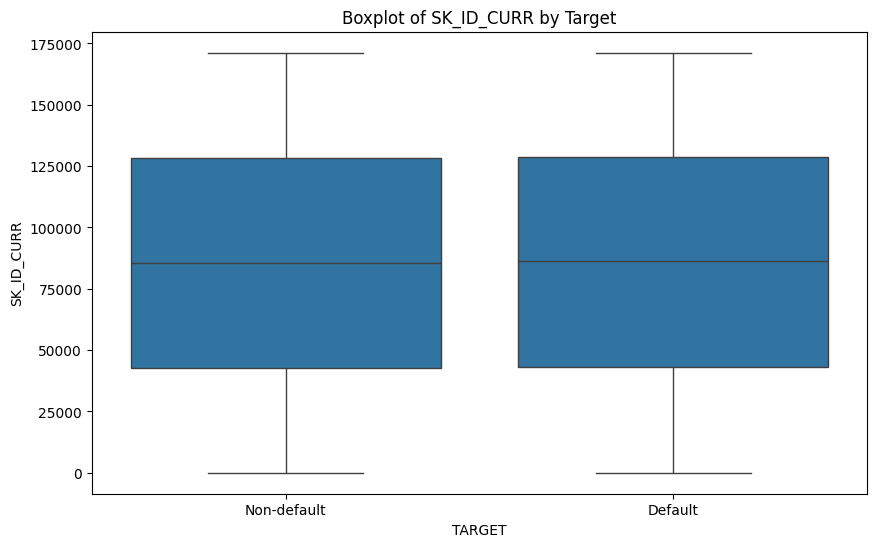

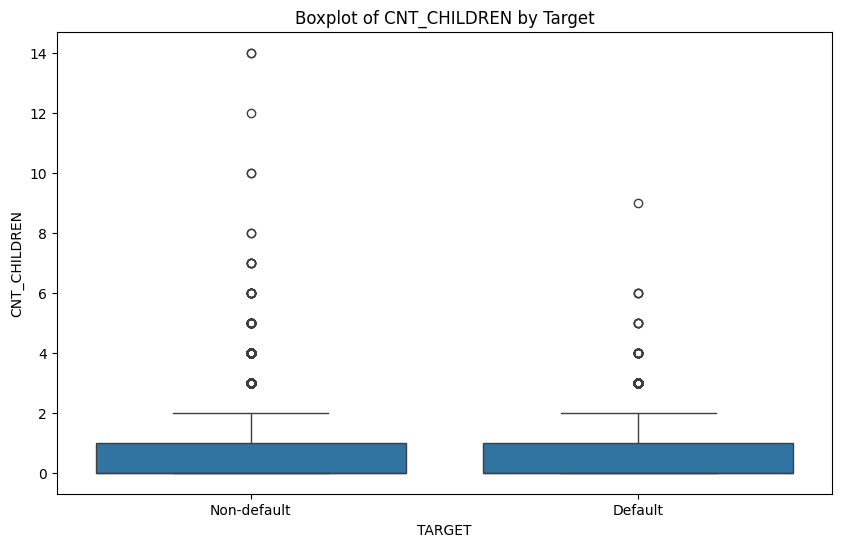

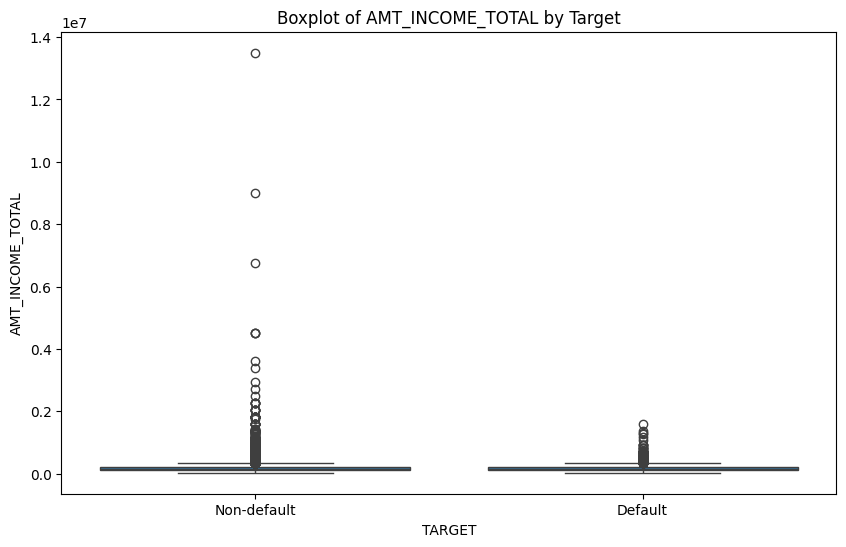

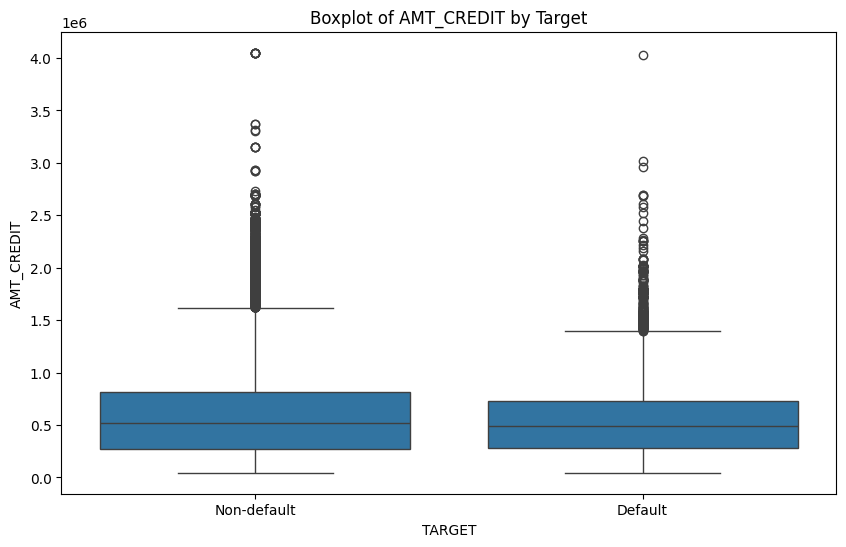

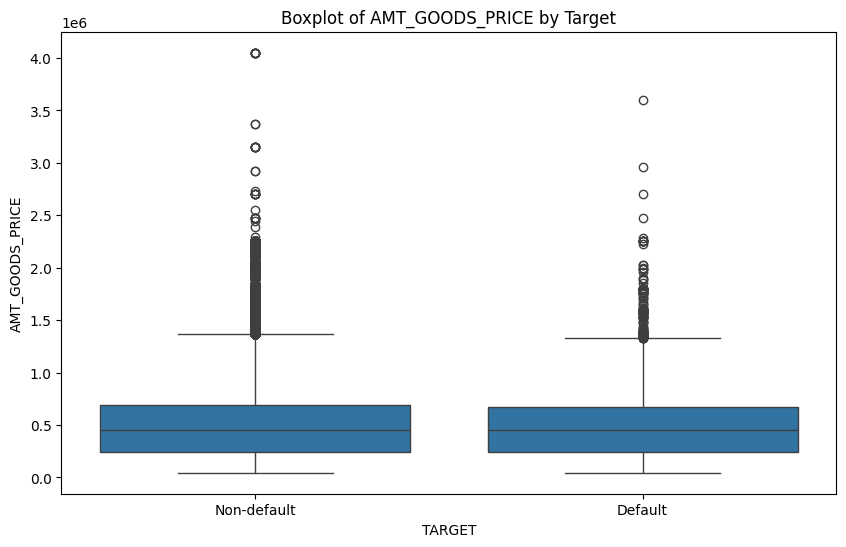

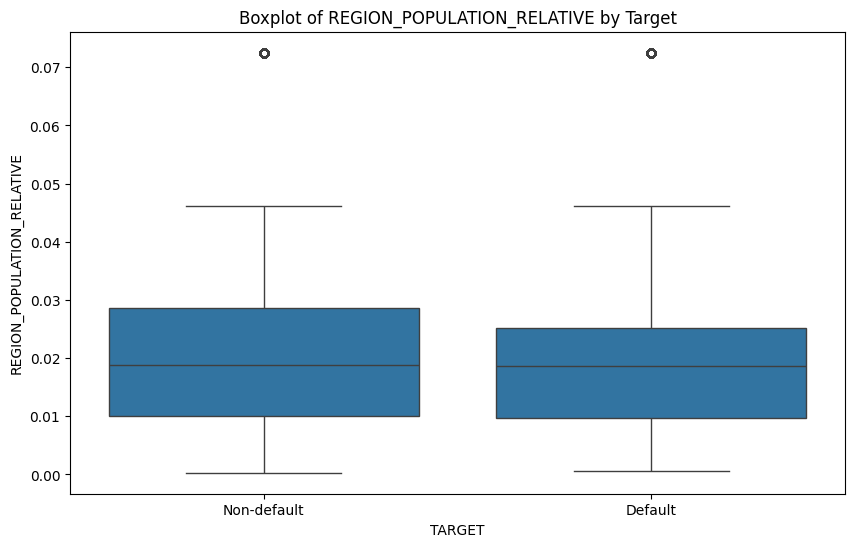

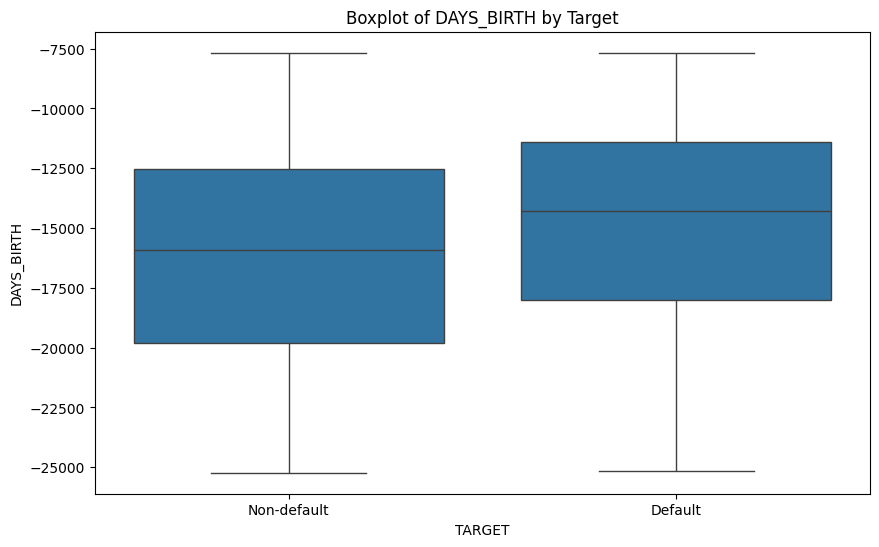

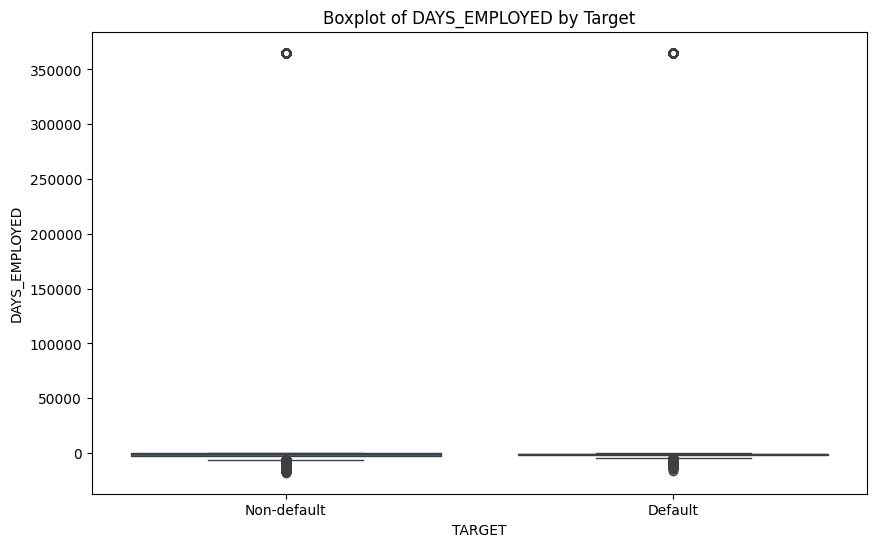

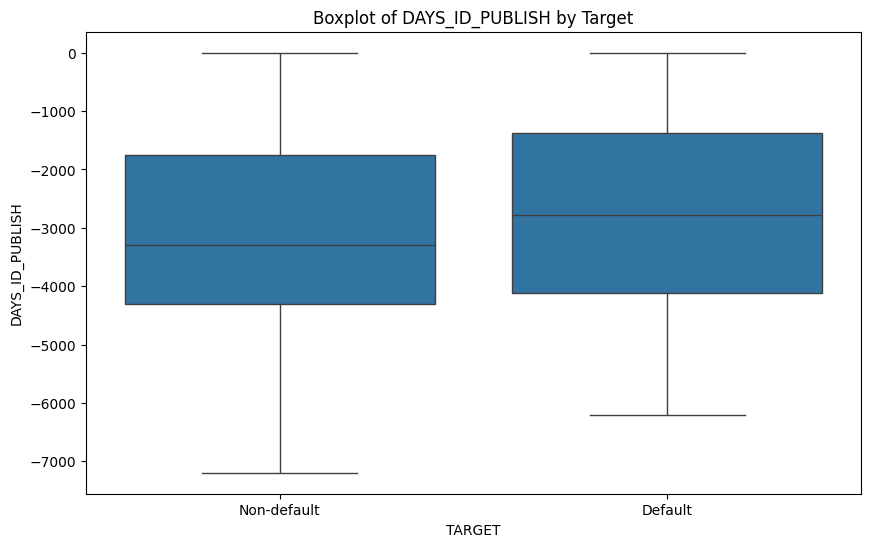

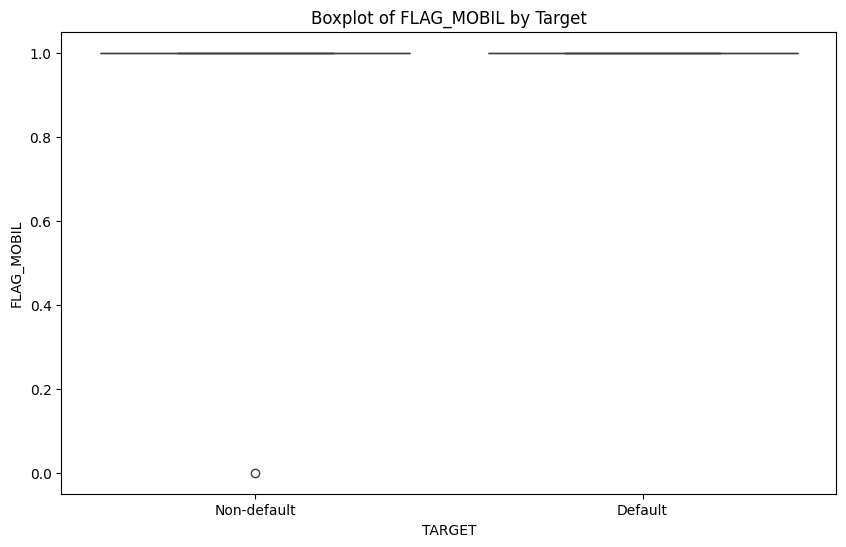

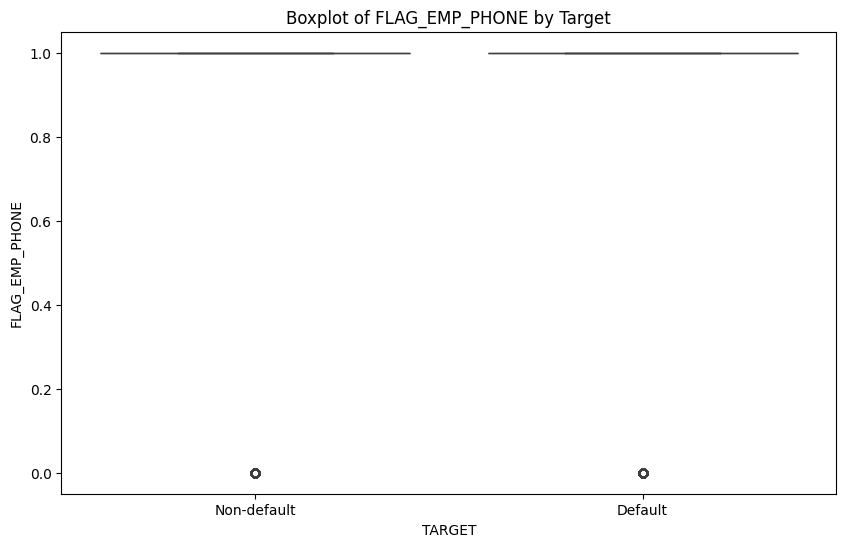

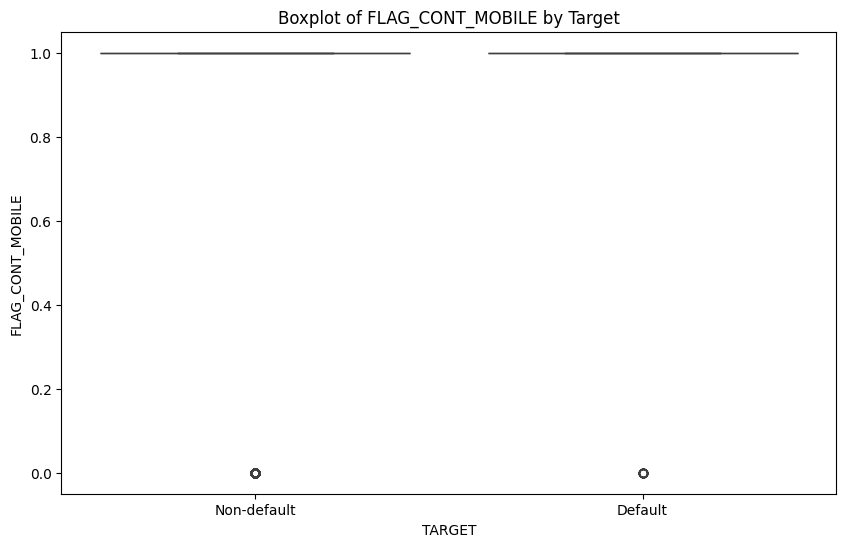

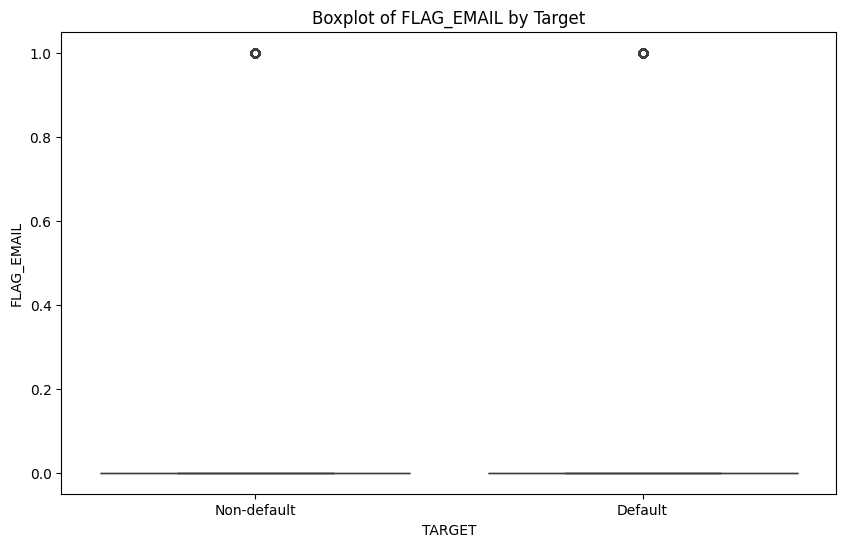

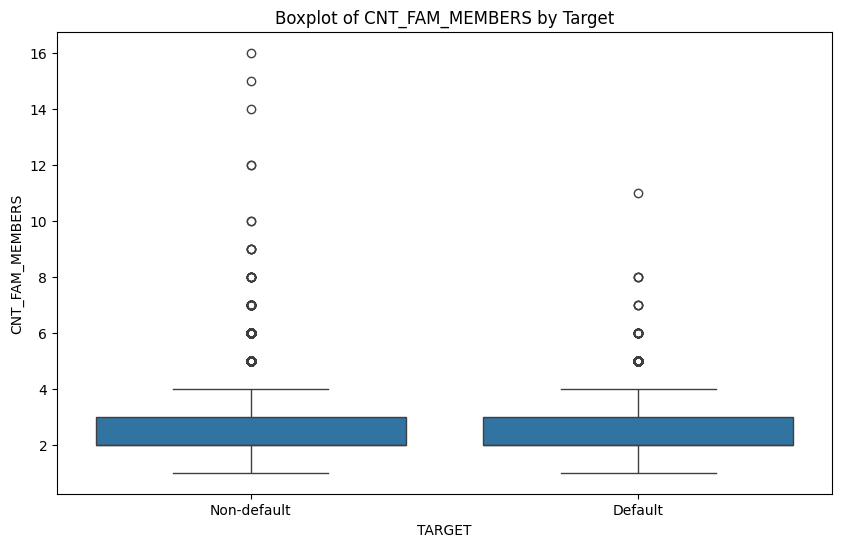

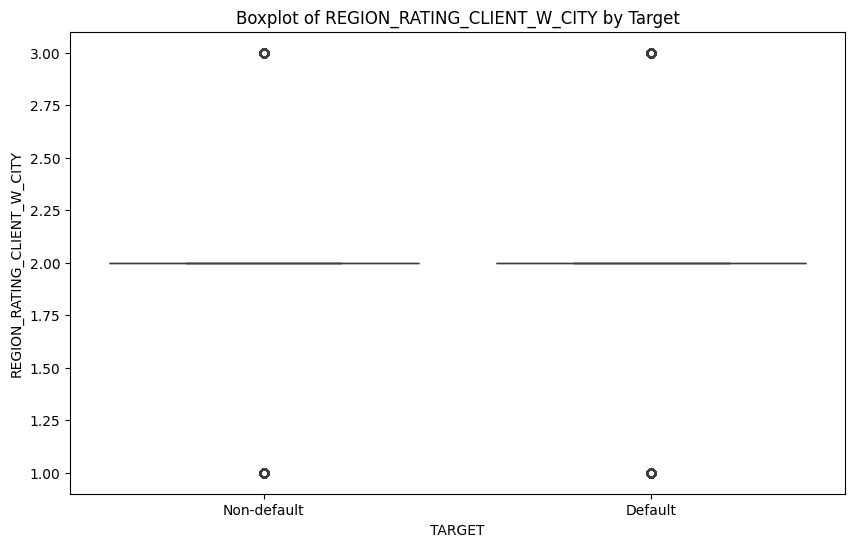

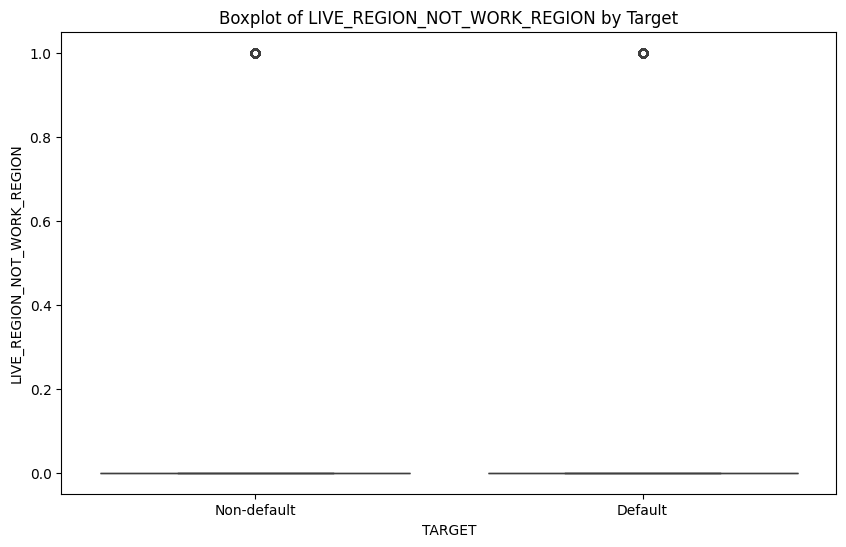

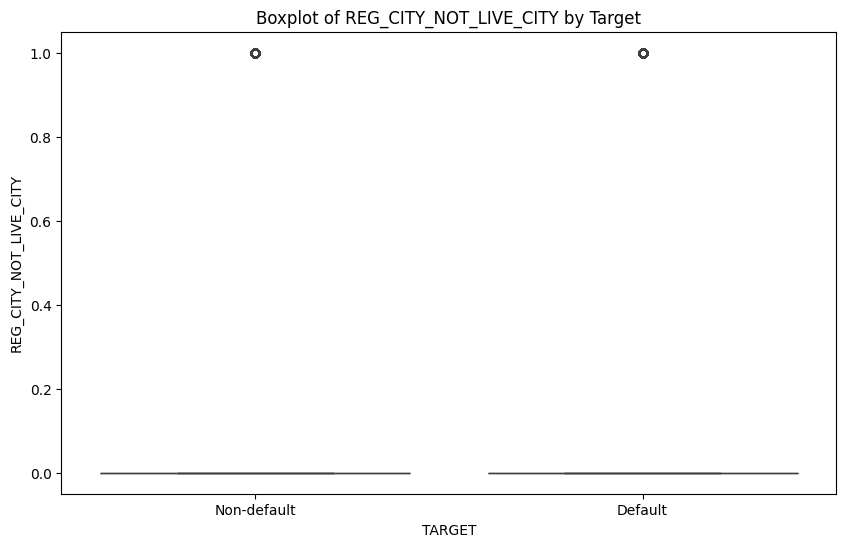

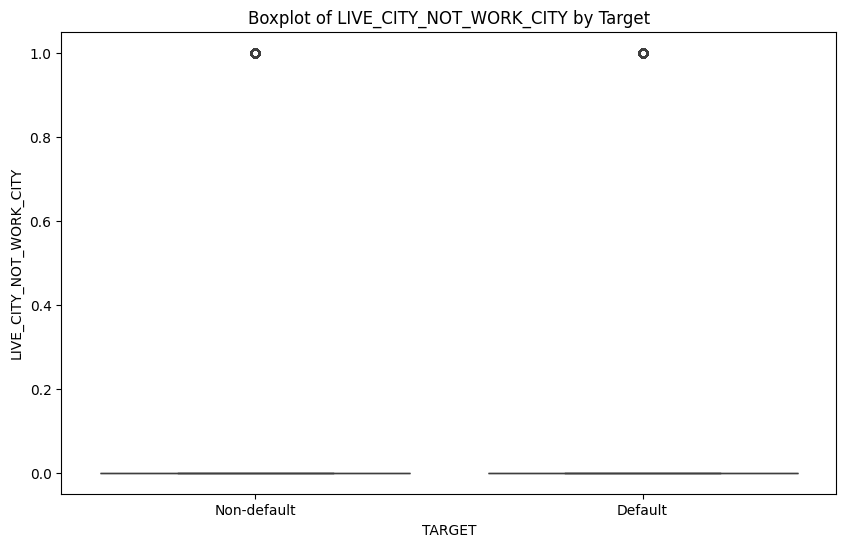

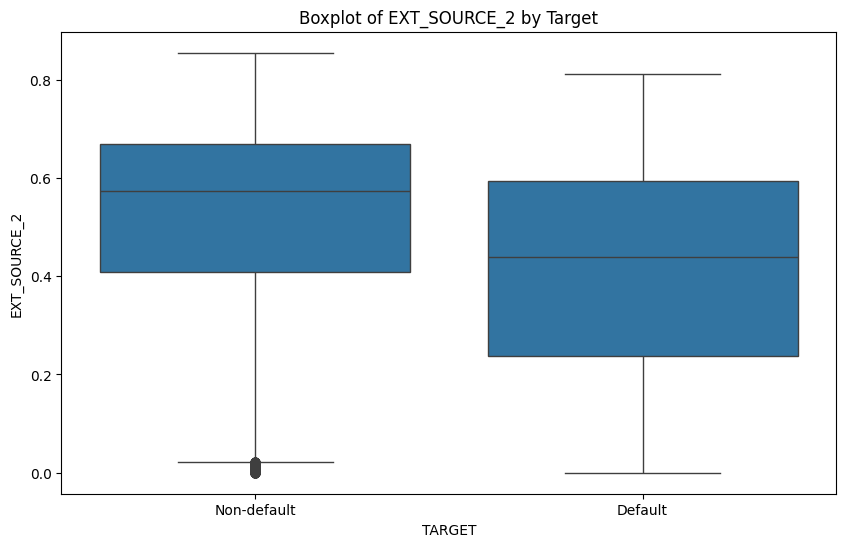

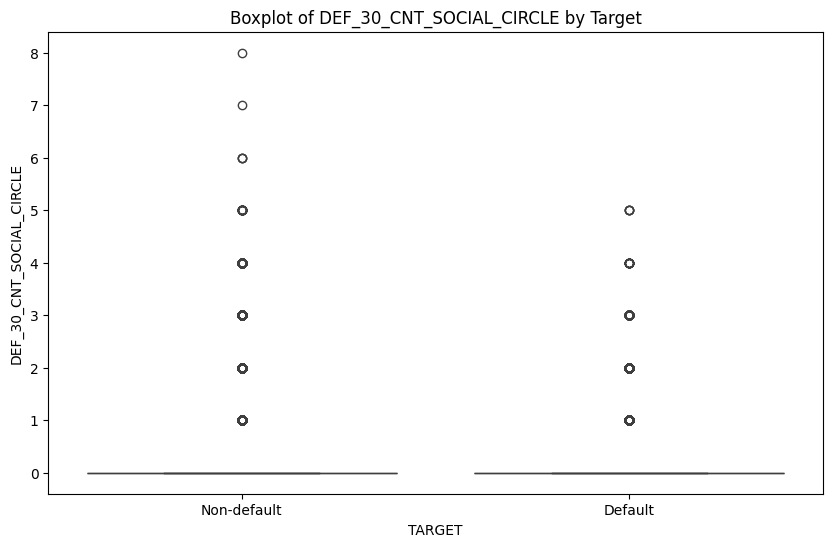

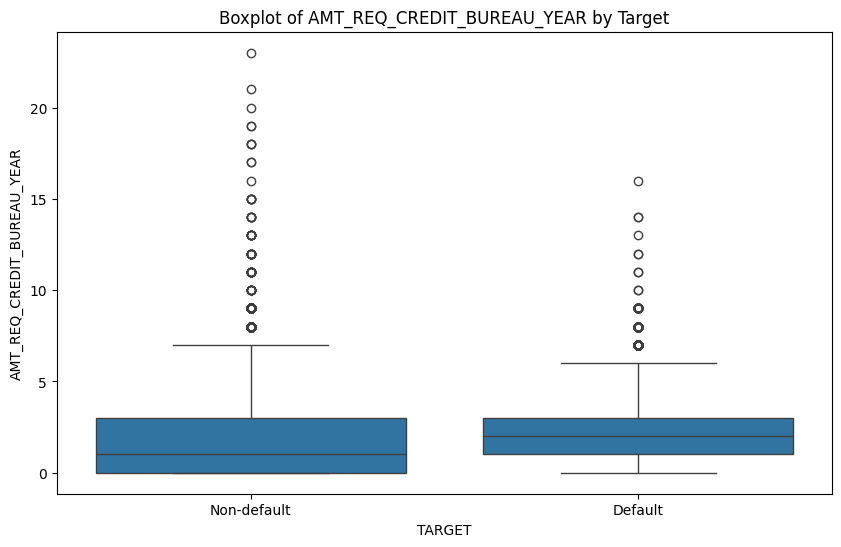

Detailed analysis completed. Results saved to 'detailed_analysis.txt'.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


# 出力用リスト
output = []

# ターゲット変数の分布
if 'TARGET' in train.columns:
    output.append("\nTarget Variable Distribution:")
    output.append(str(train['TARGET'].value_counts(normalize=True)))

# 数値特徴量の分布とターゲットによる違い
output.append("\nNumerical Feature Analysis:")
for col in numerical_features:
    # Skip columns with only one unique value or all missing values
    if train[col].nunique() <= 1 or train[col].isnull().all():
        output.append(f"Feature: {col}, Skipped due to single unique value or all missing values.")
        continue  # Move to the next column

    target_0 = train[train['TARGET'] == 0][col]
    target_1 = train[train['TARGET'] == 1][col]

    # ... (rest of your code for numerical feature analysis) ...

    # 外れ値の確認（Zスコアで閾値3を使用）
    # 外れ値の確認（Zスコアで閾値3を使用）
    for col in numerical_features:
        if train[col].dtype in ['float64', 'int64']:  # 数値データのみ対象
            z_scores = (train[col] - train[col].mean()) / train[col].std()  # Zスコアを計算
            outliers = z_scores.abs() > 3  # 絶対値が3を超えるものを外れ値とみなす
            outlier_count = outliers.sum()  # 外れ値の数を計算
            output.append(f"Feature: {col}, Outliers: {outlier_count} ({outlier_count / len(train) * 100:.2f}%)")

# カテゴリカル特徴量とターゲットの関係分析
categorical_features = train.select_dtypes(include=['object']).columns
output.append("\nCategorical Feature Analysis:")
for col in categorical_features:
    if 'TARGET' in train.columns:
        cross_tab = pd.crosstab(train[col], train['TARGET'], normalize='index')
        output.append(f"\nFeature: {col}\n{cross_tab}")

# 欠損値の確認（欠損値がターゲットと関連があるか）
missing_values = train.isnull().mean()
missing_with_target = train.groupby(train['TARGET']).apply(lambda x: x.isnull().mean())
output.append("\nMissing Value Analysis:")
output.append(f"Overall Missing Values:\n{missing_values}")
output.append(f"Missing Values by Target:\n{missing_with_target}")

# 外れ値の影響を視覚化
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train, x='TARGET', y=col)
    plt.title(f"Boxplot of {col} by Target")
    plt.xticks([0, 1], ['Non-default', 'Default'])
    plt.show()

# 結果を保存
analysis_result = "\n".join(output)
with open('detailed_analysis.txt', 'w') as file:
    file.write(analysis_result)

print("Detailed analysis completed. Results saved to 'detailed_analysis.txt'.")
